In [1]:
from tensorflow import keras

In [3]:
# h5 모델 불러오기

model = keras.models.load_model('../Data/best_cnn_model.h5')

2022-07-28 10:38:52.106859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# model의 layer확인하기

model.layers

### kernel size (3X3)로 구성된 이미지 보기

In [5]:
# 32개의 노드로 구성된 layer선택

conv = model.layers[0]
print(conv.weights[0].shape , conv.weights[1].shape )

(3, 3, 1, 32) (32,)


In [7]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean() , conv_weights.std() )
# 가중치 값이 너무 많기 때문에 보기 편하기 위해 평균으로 찍어본다.

-0.025426231 0.2727971


In [ ]:
# 이미지 톤을 알 수 있다. -> 오토발란스를 여기서 할 수 있다.  (?)

In [8]:
import matplotlib.pyplot as plt

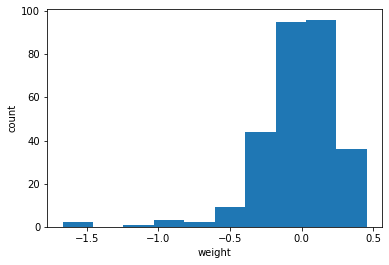

In [9]:
# 시각화 해보기
plt.hist(conv_weights.reshape(-1 , 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

> 양수 가 많으면 밝은 색이 많은것이다. 0이 많은걸로 뒷배경이 검은색이라는걸 알 수 있다.

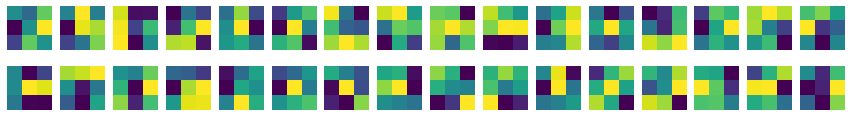

In [10]:
# 이미지로 확인하기
fig , axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[: , : , 0, i*16+j ])  # conv.weights[0].shape (3, 3, 1, 32)
        axs[i,j].axis('off')
plt.show()
# 1번째 conv2d층의 final kernel 색상 

---
### 특성맵 시각화

In [11]:
# 특성맵 (Feature 만드는것)
print(model.input)
# 이미지 크기 28X28

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [12]:
# Model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output) # 함수 만든것

In [13]:
(train_input, train_output),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

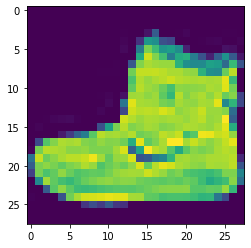

In [15]:
plt.imshow(train_input[0] ) 
#, cmap='gray_r' <- 색 선정은 우리가 보기 편하게 하려고 넣은것. 원 데이터와 착각하면 안된다. 원 색상 기반으로 필터가 만들어져 있기때문에 위에서 확인한 필터 색상이 초록파랑노랑이다.
plt.show()

위 이미지에 위에서 확인한 필터가 곱해져서 나오는게 첫번째 특성맵

In [16]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0  # 표준화 작업
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape) # 커널이 32개 곱해지므로 이미지 한장 당 특성맵 32개가 나온다.

1/1 [==============================] - 0s 366ms/step
(1, 28, 28, 32)


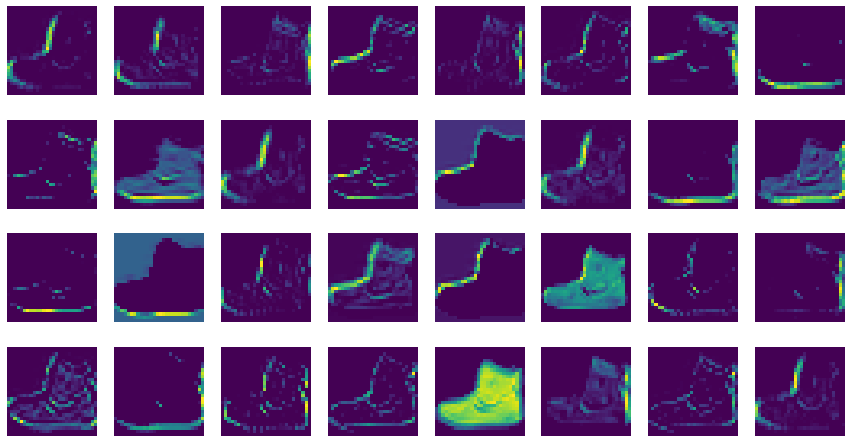

In [18]:
# 이미지로 확인하기
fig , axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4): # subplots
    for j in range(8): # subplots
        axs[i,j].imshow(feature_maps[0, :, :, i*8+j ]) # feature_maps.shape (1, 28, 28, 32)
        axs[i,j].axis('off')
plt.show()
# 1번째 kernel 로 만들어진 특성맵 

---
# 최대풀링 시각화

In [19]:
# Model 불러오기
conv2_acti = keras.models.Model(model.input , model.layers[2].output)

In [20]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0) # 정규화 해서 집어넣기
print(feature_maps.shape)

1/1 [==============================] - 0s 65ms/step
(1, 14, 14, 64)


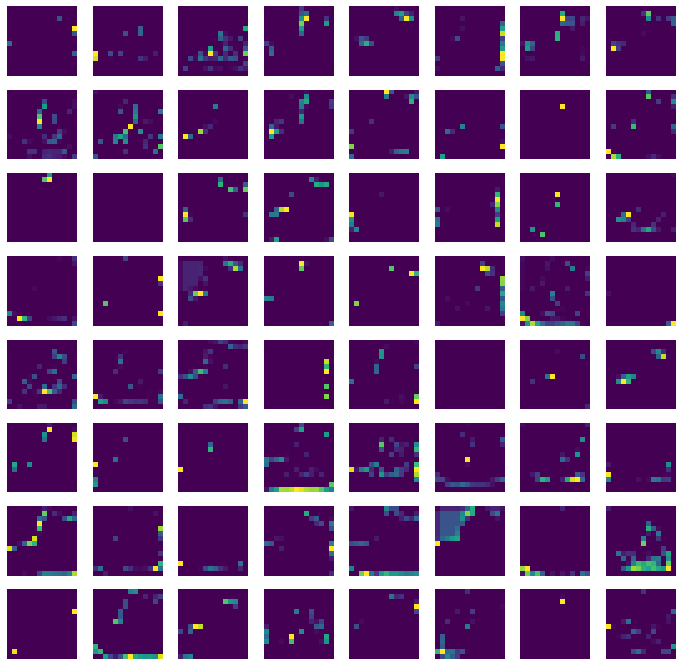

In [21]:
# 이미지로 확인하기
fig , axs = plt.subplots(8, 8, figsize = (12,12))
for i in range(8): # subplots
    for j in range(8): # subplots
        axs[i,j].imshow(feature_maps[0, :, :, i*8+j ]) # feature_maps.shape (1, 14, 14, 64)
        axs[i,j].axis('off')
plt.show()
# 특성맵을 최대풀링 거친 결과
# 색이 있는 데이터만 넘겨 받음? 